# Surfinpy

#### Tutorial 3 - Pressure

In the previous tutorials we went through the process of generating a simple phase diagram for bulk phases and introducing temperature dependence for gaseous species.  This useful however, sometimes it can be more beneficial to convert the chemical potenials (eVs) to partial presure (bar). 

Chemical potential can be converted to pressure values using

\begin{align}
P & = \frac{\mu_O}{k_B T} ,
\end{align}

where P is the pressure, $\mu$ is the chemical potential of oxygen, $k_B$ is the Boltzmnann constant and T is the temperature. 

In [10]:
import matplotlib.pyplot as plt

from surfinpy import bulk_mu_vs_mu as bmvm
from surfinpy import utils as ut
from surfinpy import data

colors = ['#5B9BD5', '#4472C4', '#A5A5A5', '#772C24', '#ED7D31', '#FFC000', '#70AD47']

In [11]:
bulk = data.ReferenceDataSet(cation = 1, anion = 1, energy = -92.0, funits = 10)

Additionally, SurfinPy has the functionality to allow you to choose which colours are used for each phase.  Specify within the DataSet class color. 

In [12]:
Bulk = data.DataSet(cation = 10, x = 0, y = 0, energy = -92.0, color=colors[0], label = "Bulk")
D = data.DataSet(cation = 10, x = 10, y = 0, energy = -310.0, color=colors[1], label = "D")
B = data.DataSet(cation = 10, x = 0, y = 10, energy = -228.0, color=colors[2], label = "B")
F = data.DataSet(cation = 10, x = 8, y = 10, energy = -398.0, color=colors[3], label = "F")
A = data.DataSet(cation = 10, x = 5, y = 20, energy = -470.0, color=colors[4], label = "A")
C = data.DataSet(cation = 10, x = 10, y = 30, energy = -706.0, color=colors[5], label = "C")
E = data.DataSet(cation = 10, x = 10, y = 50, energy = -972.0, color=colors[6], label = "E")


In [13]:
data = [Bulk, A, B, C,  D, E, F]

In [14]:
x_energy=-20.53412969
y_energy=-12.83725889

In [15]:
CO2_exp = ut.fit_nist("ref_files/CO2.txt")[298]
Water_exp = ut.fit_nist("ref_files/H2O.txt")[298]

CO2_corrected = x_energy + CO2_exp
Water_corrected = y_energy + Water_exp

deltaX = {'Range': [ -1, 0.6],  'Label': 'CO_2'}
deltaY = {'Range': [ -1, 0.6], 'Label': 'H_2O'}

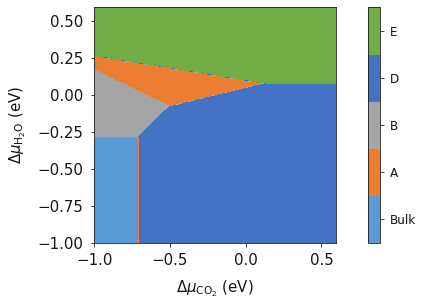

In [16]:
system = bmvm.calculate(data, bulk, deltaX, deltaY, x_energy=CO2_corrected, y_energy=Water_corrected)

ax = system.plot_phase(figsize=(6, 4.5))

plt.show()

To convert chemical potential to pressure use the plot_pressure command and the temperature at which the pressure is calculated.  For this example we have used 298 K.

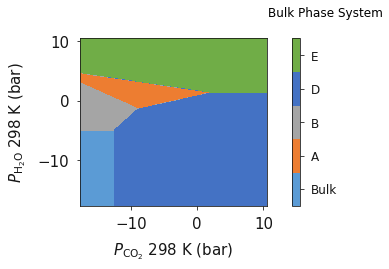

In [17]:
import surfinpy
ax = system.plot_pressure(temperature=298, figsize=(5, 4), cbar_title="Bulk Phase System")
plt.show()